# Inicial Configurations

## Honor code

In [1]:
name = "Lucas Paiolla and Marcos Siolin" 

honorPledge = "We affirm that we have not given or received any unauthorized " \
              "help on this assignment, and that this work is our own.\n"


print("\nName: ", name)
print("\nHonor pledge: ", honorPledge)


Name:  Lucas Paiolla and Marcos Siolin

Honor pledge:  We affirm that we have not given or received any unauthorized help on this assignment, and that this work is our own.



## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression 
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC

from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

#%matplotlib inline

## Loading datasets and getting their dataframes version

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# Reduce the image size to its half 
X_train = np.array([image[::2, 1::2] for image in X_train])
X_test  = np.array([image[::2, 1::2] for image in X_test])

In [5]:
NUM_PIXELS = X_train.shape[2] ** 2
TRAIN_SIZE = X_train.shape[0]
TEST_SIZE = X_test.shape[0]
RANDOM_SEED = 42

print(f'NUM_PIXELS = {NUM_PIXELS}\nTRAIN_SIZE = {TRAIN_SIZE}\nTEST_SIZE = {TEST_SIZE}')

NUM_PIXELS = 196
TRAIN_SIZE = 60000
TEST_SIZE = 10000


In [6]:
X_train = (X_train/255.0).astype('float32').reshape((TRAIN_SIZE, NUM_PIXELS))
X_test = (X_test/255.0).astype('float32').reshape((TEST_SIZE, NUM_PIXELS))
y_train = y_train.reshape((TRAIN_SIZE, 1)).astype('int8')
y_test = y_test.reshape((TEST_SIZE, 1)).astype('int8')

In [7]:
train_df = pd.DataFrame(np.concatenate([X_train, y_train], axis=1))
train_df = train_df.rename(columns=lambda x : 'class' if x == NUM_PIXELS else f'f_{x}')
train_df['class'] = train_df['class'].astype('int8')
train_df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.054902,0.988235,0.0,0.0,0.0,0.0,0.0,9


In [8]:
test_df = pd.DataFrame(np.concatenate([X_test.reshape(TEST_SIZE, NUM_PIXELS), y_test.reshape(TEST_SIZE, 1)], axis=1))
test_df = test_df.rename(columns=lambda x : 'class' if x == NUM_PIXELS else f'f_{x}')
test_df['class'] = test_df['class'].astype('int8')
test_df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.996078,0.070588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


# Data Visualization

In [9]:
sns.set_theme(context='notebook', style='darkgrid', palette='colorblind', font_scale=1.2)

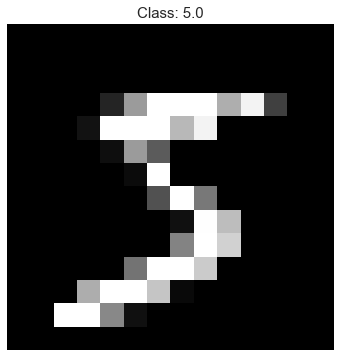

In [10]:
def show_digit(digit, ax=None):
    """
    Receives a pandas.Series representing a 28x28 image and plot it. 
    If ax is set, then plot the image on that axis, otherwise plot it using plt.
    """
    if ax == None: # if none, set to a new axis
        fig, ax = plt.subplots(1, 1)
    else:
        fig = plt.gcf()
    
    ax.imshow(digit[:-1].to_numpy().reshape(int(NUM_PIXELS ** 0.5), int(NUM_PIXELS ** 0.5)), cmap='gray')
    ax.set_title(f'Class: {digit[-1]}', fontdict=dict(fontsize=15))
    ax.axis('off')
    
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
show_digit(train_df.iloc[0], ax=ax)

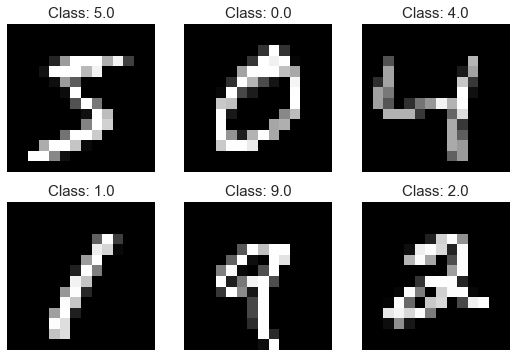

In [11]:
fig, ax = plt.subplots(2, 3, figsize = (9, 6))

for i in range(6):
    show_digit(train_df.iloc[i], ax=ax[i//3, i%3])
plt.show()

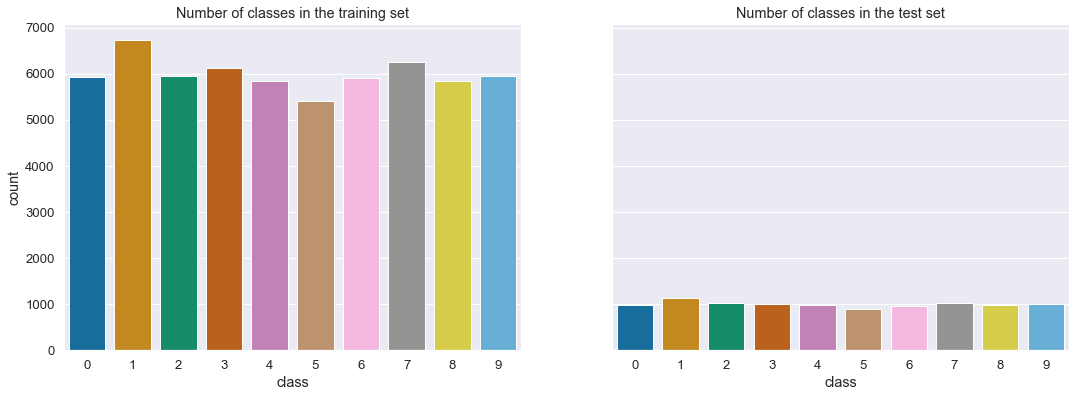

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6),  sharey=True, sharex=True)
sns.countplot(x='class', data=train_df, ax=ax[0])
ax[0].set_title('Number of classes in the training set')
sns.countplot(x='class', data=test_df, ax=ax[1])
ax[1].set_title('Number of classes in the test set')
ax[1].set_ylabel('');

# Data Preparation

In [13]:
d_train, d_val, y_train, y_val = train_test_split(train_df.iloc[:, :-1], train_df['class'], test_size=.3, random_state=RANDOM_SEED, stratify=None)

Conferindo que os índices estão iguais:

In [14]:
d_train.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_186,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195
918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
y_train.head()

918      7
17141    4
15558    5
27327    0
11606    1
Name: class, dtype: int8

In [16]:
d_train['class'] = y_train
d_val['class'] = y_val

Verificando que os dados estão estratificados:

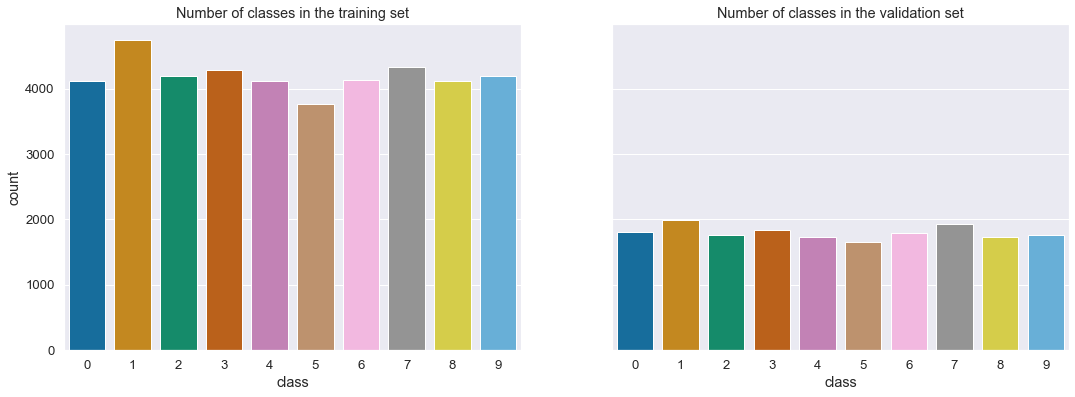

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6),  sharey=True, sharex=True)
sns.countplot(x='class', data=d_train, ax=ax[0])
ax[0].set_title('Number of classes in the training set')
sns.countplot(x='class', data=d_val, ax=ax[1])
ax[1].set_title('Number of classes in the validation set')
ax[1].set_ylabel('');

De fato os dados estão estratificados (podemos verificar comparando esse gráfico com o anterior)

In [18]:
d_train.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,class
918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
17141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
15558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
27327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
11606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [19]:
d_val.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,class
12628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.647059,0.403922,0.0,0.0,0.0,0.0,0.0,0.0,7
37730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3
39991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,8
8525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,9
8279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3


In [20]:
d_val['class']

12628    7
37730    3
39991    8
8525     9
8279     3
        ..
2649     9
1807     1
2861     5
19732    0
8897     0
Name: class, Length: 18000, dtype: int8

# Training, evaluating and selecting models

In [36]:
log_reg = LogisticRegression(random_state=RANDOM_SEED, n_jobs=-1)
nn = MLPClassifier(hidden_layer_sizes=(10,), random_state=RANDOM_SEED)
svc = LinearSVC()

In [37]:
log_reg_params = {
    'C' : np.geomspace(1e-3, 1e3, 7)
}

nn_params = {
    'alpha' : np.geomspace(1e-3, 1e3, 7)
}

svc_params = {
   'C' : np.geomspace(1e-3, 1e3, 7)
}

log_reg_gs = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='accuracy', n_jobs=5, verbose=3)
log_reg_gs.fit(d_train.iloc[:, :-1], d_train.iloc[:, -1])
nn_gs = GridSearchCV(nn, nn_params, cv=5, scoring='accuracy', n_jobs=5, verbose=3)
nn_gs.fit(d_train.iloc[:, :-1], d_train.iloc[:, -1])
svc_gs = GridSearchCV(svc, svc_params, cv=5, scoring='accuracy', n_jobs=5, verbose=3)
svc_gs.fit(d_train.iloc[:, :-1], d_train.iloc[:, -1])

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:   39.8s
[Parallel(n_jobs=5)]: Done  35 out of  35 | elapsed:   55.1s finished


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:  5.5min
[Parallel(n_jobs=5)]: Done  35 out of  35 | elapsed:  5.9min finished
D:\Programming\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:  1.9min
[Parallel(n_jobs=5)]: Done  35 out of  35 | elapsed:  4.3min finished
D:\Programming\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=5,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             scoring='accuracy', verbose=3)

In [49]:
log_reg_score = log_reg_gs.best_score_
nn_score = nn_gs.best_score_
svc_score = svc_gs.best_score_
log_reg_score, nn_score, svc_score

(0.9073333333333332, 0.9275714285714285, 0.8989047619047618)

In [52]:
(log_reg_gs.best_params_, nn_gs.best_params_ ,svc_gs.best_params_)

({'C': 10.0}, {'alpha': 0.01}, {'C': 1.0})

# Choosing a final model

In [40]:
log_reg_predict = log_reg_gs.best_estimator_.predict(d_val.iloc[:, :-1])
log_reg_predict

array([7, 3, 8, ..., 5, 0, 0], dtype=int8)

In [41]:
nn_predict = nn_gs.best_estimator_.predict(d_val.iloc[:, :-1])
nn_predict

array([7, 3, 8, ..., 5, 0, 0], dtype=int8)

In [42]:
svc_predict = svc_gs.best_estimator_.predict(d_val.iloc[:, :-1])
svc_predict

array([7, 3, 8, ..., 5, 0, 0], dtype=int8)

In [43]:
log_reg_accuracy = accuracy_score(d_val['class'], log_reg_predict)
nn_accuracy = accuracy_score(d_val['class'], nn_predict)
svc_accuracy = accuracy_score(d_val['class'], svc_predict)

In [46]:
print(f'ERROS NO CONJUNTO DE VALIDAÇÃO:\n')
print(f'Regressão Logística: {log_reg_accuracy*100:.2f}%\n')
print(f'Rede Neural: {nn_accuracy*100:.2f}%\n')
print(f'Support Vector Machine: {svc_accuracy*100:.2f}%\n')

ERROS NO CONJUNTO DE VALIDAÇÃO:

Regressão Logística: 91.07%

Rede Neural: 92.94%

Support Vector Machine: 90.26%



# Error estimation

In [57]:
best_val_estimator = nn_gs.best_estimator_
y_predict = best_val_estimator.predict(test_df.iloc[:, :-1])
y_true = test_df.iloc[:, -1]
test_accuracy = accuracy_score(y_true, y_predict)
test_accuracy * 100

93.4